In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-09-01 03:56:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  17.7MB/s    in 11s     

2024-09-01 03:57:07 (15.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import zipfile
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'")

There are 2 directories and 0 in '10_food_classes_10_percent'
There are 10 directories and 0 in '10_food_classes_10_percent/test'
There are 0 directories and 250 in '10_food_classes_10_percent/test/grilled_salmon'
There are 0 directories and 250 in '10_food_classes_10_percent/test/pizza'
There are 0 directories and 250 in '10_food_classes_10_percent/test/ice_cream'
There are 0 directories and 250 in '10_food_classes_10_percent/test/ramen'
There are 0 directories and 250 in '10_food_classes_10_percent/test/chicken_wings'
There are 0 directories and 250 in '10_food_classes_10_percent/test/fried_rice'
There are 0 directories and 250 in '10_food_classes_10_percent/test/sushi'
There are 0 directories and 250 in '10_food_classes_10_percent/test/chicken_curry'
There are 0 directories and 250 in '10_food_classes_10_percent/test/hamburger'
There are 0 directories and 250 in '10_food_classes_10_percent/test/steak'
There are 10 directories and 0 in '10_food_classes_10_percent/train'
There are 0 d

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

print("Training Data")
train_data_10_percent=train_datagen.flow_from_directory(train_dir,
                                                        batch_size=BATCH_SIZE,
                                                        target_size=IMAGE_SHAPE,
                                                        class_mode='categorical')

print("Testing Data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=BATCH_SIZE,
                                           target_size=IMAGE_SHAPE,
                                           class_mode='categorical')

Training Data
Found 750 images belonging to 10 classes.
Testing Data
Found 2500 images belonging to 10 classes.


In [5]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name+'/'+experiment_name+'/'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback=tf_keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [6]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name+'/'+experiment_name+'/'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback=tf_keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow import keras
import tf_keras

In [8]:
import tensorflow_hub as hub
resnet_model = tf_keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/101-classification/2",
                   input_shape=IMAGE_SHAPE+(3,),
                   trainable=False)
])


In [9]:
resnet_model.add(tf_keras.layers.Dense(10,activation='softmax',name='output_layer'))

In [10]:
resnet_model.compile(loss='categorical_crossentropy',
          optimizer=tf_keras.optimizers.Adam(),
          metrics=['accuracy'])

In [11]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              44677609  
                                                                 
 output_layer (Dense)        (None, 10)                10020     
                                                                 
Total params: 44687629 (170.47 MB)
Trainable params: 10020 (39.14 KB)
Non-trainable params: 44677609 (170.43 MB)
_________________________________________________________________


In [12]:
resnet_history=resnet_model.fit(train_data_10_percent,epochs=5,
                 steps_per_epoch=len(train_data_10_percent),
                 validation_data=test_data,validation_steps=len(test_data),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name='resnet50V2')])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20240901-035849
Epoch 1/5
24/24 [==============================] - 40s 1s/step - loss: 2.5200 - accuracy: 0.3507 - val_loss: 1.2011 - val_accuracy: 0.6000
Epoch 2/5
24/24 [==============================] - 24s 1s/step - loss: 0.9997 - accuracy: 0.7187 - val_loss: 0.8660 - val_accuracy: 0.7128
Epoch 3/5
24/24 [==============================] - 17s 752ms/step - loss: 0.6974 - accuracy: 0.7907 - val_loss: 0.7913 - val_accuracy: 0.7388
Epoch 4/5
24/24 [==============================] - 25s 1s/step - loss: 0.5551 - accuracy: 0.8280 - val_loss: 0.8041 - val_accuracy: 0.7312
Epoch 5/5
24/24 [==============================] - 17s 716ms/step - loss: 0.4444 - accuracy: 0.8720 - val_loss: 0.7430 - val_accuracy: 0.7496


In [13]:
# So our transfer learning feature vector model outperforms all the model we built earlier, also it was quicker and
# it gives just good accuracy with just 10% of data

In [14]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(history.history['loss']))

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title("loss")
  plt.xlabel('epochs')
  plt.legend()


  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='validation_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


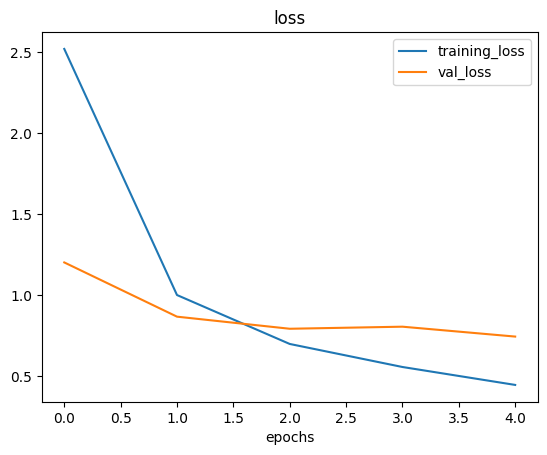

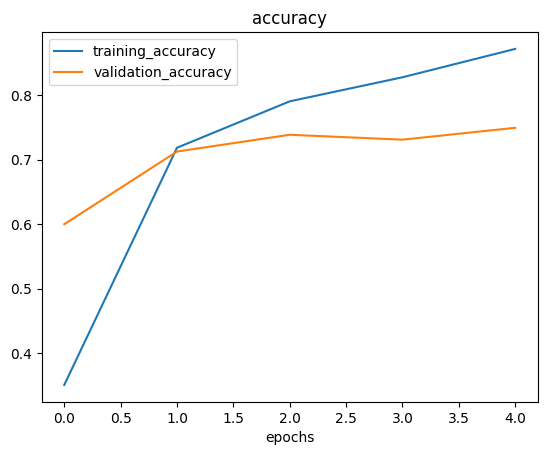

In [15]:
plot_loss_curves(resnet_history)

In [21]:
import tensorflow_hub as hub
efficientnet = tf_keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-classification/2")
])

In [22]:
efficientnet.add(tf_keras.layers.Dense(10,activation='softmax'))

In [23]:
efficientnet.compile(loss='categorical_crossentropy',
                     optimizer='Adam',
                     metrics=['accuracy'])


In [26]:
efficientnet_history=efficientnet.fit(train_data_10_percent,steps_per_epoch=len(train_data_10_percent),
                 epochs=5,validation_data=test_data,
                validation_steps=len(test_data),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name="efficientnet-v2")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet-v2/20240901-042341
Epoch 1/5
24/24 [==============================] - 20s 528ms/step - loss: 2.0621 - accuracy: 0.3293 - val_loss: 1.2098 - val_accuracy: 0.6160
Epoch 2/5
24/24 [==============================] - 10s 417ms/step - loss: 1.0129 - accuracy: 0.6813 - val_loss: 0.8981 - val_accuracy: 0.7092
Epoch 3/5
24/24 [==============================] - 12s 526ms/step - loss: 0.7595 - accuracy: 0.7600 - val_loss: 0.8216 - val_accuracy: 0.7144
Epoch 4/5
24/24 [==============================] - 10s 441ms/step - loss: 0.6205 - accuracy: 0.8080 - val_loss: 0.7683 - val_accuracy: 0.7504
Epoch 5/5
24/24 [==============================] - 11s 497ms/step - loss: 0.5370 - accuracy: 0.8467 - val_loss: 0.7351 - val_accuracy: 0.7540


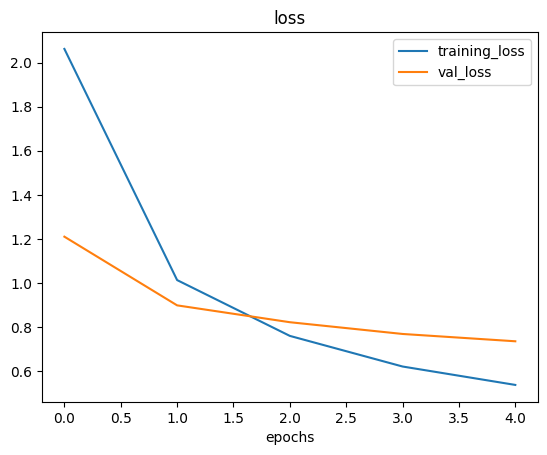

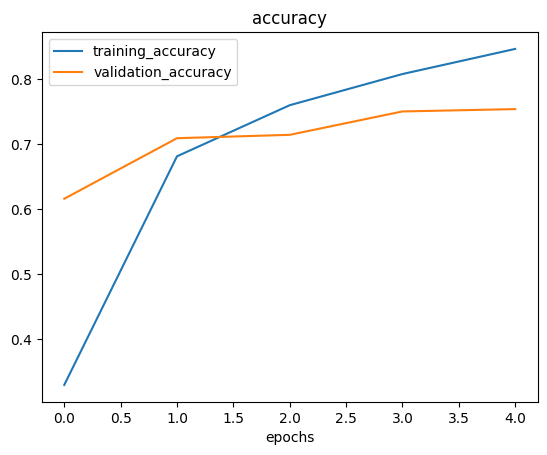

In [27]:
plot_loss_curves(efficientnet_history)

In [28]:
efficientnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dense (Dense)               (None, 10)                10010     
                                                                 
Total params: 7210322 (27.51 MB)
Trainable params: 10010 (39.10 KB)
Non-trainable params: 7200312 (27.47 MB)
_________________________________________________________________


In [29]:
efficientnet.layers

In [30]:
efficientnet.weights

[<tf.Variable 'efficientnetv2-b0/blocks_0/conv2d/kernel:0' shape=(3, 3, 32, 16) dtype=float32, numpy=
 array([[[[-5.94594218e-02, -7.44766444e-02,  7.73946792e-02, ...,
           -4.75223213e-02, -1.64383147e-02,  2.40414403e-02],
          [ 2.06293672e-01, -1.42147690e-01, -2.65499145e-01, ...,
            2.20955521e-01, -5.51458180e-01, -2.37723380e-01],
          [-1.41259670e-01,  3.34561437e-01,  5.90374134e-02, ...,
            5.62243164e-02,  3.58434558e-01,  1.42930061e-01],
          ...,
          [ 5.99914014e-01, -6.84944034e-01, -4.46961969e-02, ...,
           -4.20490251e-05, -9.63406563e-02, -1.65576026e-01],
          [ 7.49164522e-02, -2.42080409e-02, -5.55956140e-02, ...,
           -8.29447657e-02,  4.52119820e-02,  2.96875518e-02],
          [ 7.37623945e-02, -6.08566329e-02, -5.76227717e-02, ...,
            7.81408045e-03,  7.88327083e-02, -4.91431616e-02]],
 
         [[ 5.26624843e-02, -1.83748975e-02,  3.26712951e-02, ...,
           -3.23574618e-02, -7.92

In [35]:
len(efficientnet.layers[0].weights)

361

##Three types of transfer learning
1. As is
2. Feature Extractor Transfer Learning
3. Fine Tuning

In [37]:
!tensorboard dev upload --dir./tensorflow_hub/ \
--name "Efficient net-V2 Vs Resnet-50 V2" \
--description 'Comparing two different TF Hub Feature extraction model architectures' \
--one_shot

2024-09-01 04:48:20.168798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 04:48:20.198097: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 04:48:20.205960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 04:48:21.232926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ERROR: The `tensorboard dev` command is no longer available.

TensorBoard.dev has been shut down. For further information,
see the FAQ at <https://tensorboard.dev/>.


In [38]:
!tensorboard dev list

2024-09-01 04:54:13.262770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 04:54:13.296004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 04:54:13.305916: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 04:54:14.723009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ERROR: The `tensorboard dev` command is no longer available.

TensorBoard.dev has been shut down. For further information,
see the FAQ at <https://tensorboard.dev/>.
